In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#     print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models
import time
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from tensorflow.keras.losses import binary_crossentropy

2024-03-20 22:27:05.210805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 22:27:05.210917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 22:27:05.349905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['Sex','RestingECG','ST_Slope','ChestPainType','ExerciseAngina']) * 1

In [8]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,RestingECG_LVH,...,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,49,160,180,0,156,1.0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
3,48,138,214,0,108,1.5,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
914,68,144,193,1,141,3.4,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
916,57,130,236,0,174,0.0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    int64  
 8   Sex_M              918 non-null    int64  
 9   RestingECG_LVH     918 non-null    int64  
 10  RestingECG_Normal  918 non-null    int64  
 11  RestingECG_ST      918 non-null    int64  
 12  ST_Slope_Down      918 non-null    int64  
 13  ST_Slope_Flat      918 non-null    int64  
 14  ST_Slope_Up        918 non-null    int64  
 15  ChestPainType_ASY  918 non-null    int64  
 16  ChestPainType_ATA  918 non

In [10]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,RestingECG_LVH,...,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.145727,...,0.136798,0.138397,0.185568,-0.258067,0.166607,-0.218165,-0.011335,0.032042,-0.215793,0.215793
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.053166,...,0.090447,-0.007912,0.099207,-0.096146,0.048824,-0.046153,-0.041348,0.049855,-0.155101,0.155101
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,0.177077,...,-0.133106,-0.083371,-0.050953,0.094027,-0.120531,0.150954,-0.006634,0.017365,0.034166,-0.034166
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,-0.011656,...,0.127110,0.105102,0.107006,-0.161730,0.131176,-0.140514,-0.039249,0.026885,-0.060451,0.060451
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,0.125793,...,-0.157879,-0.073316,-0.342581,0.383397,-0.354963,0.253735,0.134580,0.100025,0.370425,-0.370425
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.086794,...,0.055958,0.322130,0.283295,-0.450577,0.280026,-0.262124,-0.106212,0.032231,-0.408752,0.408752
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.010670,...,0.102527,0.122527,0.554134,-0.622164,0.516716,-0.401924,-0.212964,-0.054790,-0.494282,0.494282
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,0.049518,...,-0.063715,-0.066036,-0.116077,0.150942,-0.183876,0.161522,0.066486,0.004031,0.190664,-0.190664
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,-0.049518,...,0.063715,0.066036,0.116077,-0.150942,0.183876,-0.161522,-0.066486,-0.004031,-0.190664,0.190664
RestingECG_LVH,0.145727,0.053166,0.177077,-0.011656,0.125793,0.086794,0.010670,0.049518,-0.049518,1.000000,...,-0.248892,0.043755,0.015091,-0.037582,0.002289,-0.085791,0.035299,0.081407,0.016382,-0.016382


<Axes: >

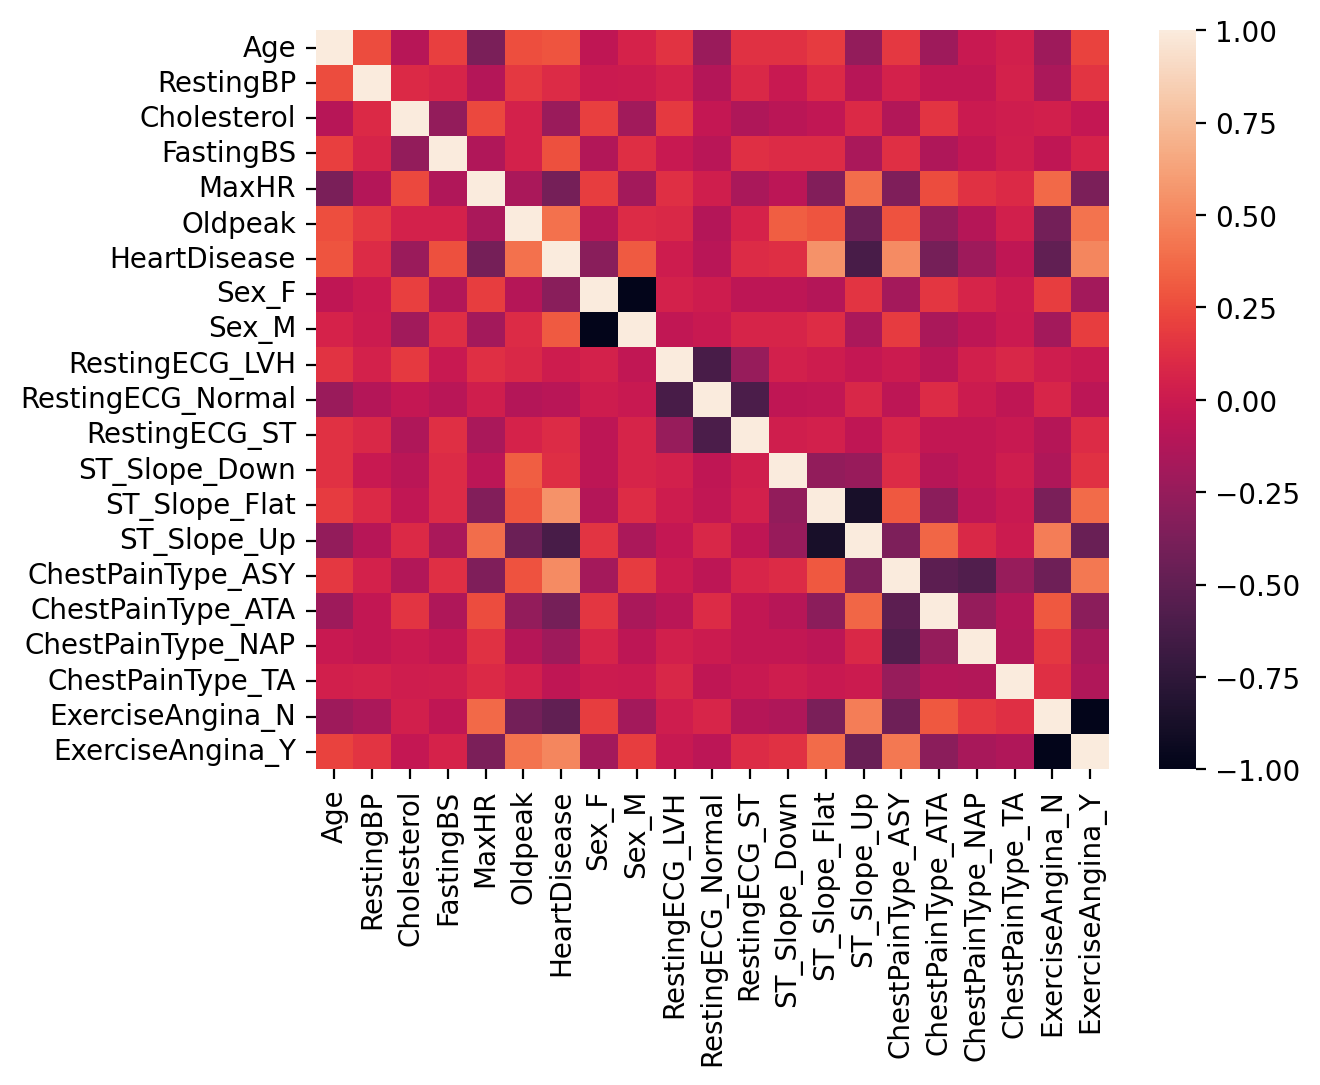

In [11]:
plt.figure(dpi=200)
sns.heatmap(df.corr())

In [12]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,RestingECG_LVH,...,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,49,160,180,0,156,1.0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
3,48,138,214,0,108,1.5,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [13]:
x = df.drop('HeartDisease',axis=1)

In [14]:
y = df['HeartDisease']

In [15]:
x.shape

(918, 20)

In [16]:
y.shape

(918,)

In [17]:
xx,xtest,yy,ytest = train_test_split(x,y,random_state=101,test_size=0.2)
xtrain,xval,ytrain,yval = train_test_split(xx,yy,random_state=101,test_size=0.2)

In [18]:
def convert_to_binary(predictions, threshold):
    binary_predictions = (predictions > threshold).astype(int)
    return binary_predictions

In [19]:
mymodel = models.Sequential([
    layers.Input(shape=(20,)),
    layers.Flatten(), 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
mymodel.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),loss=binary_crossentropy)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, restore_best_weights=True)
history = mymodel.fit(xtrain,ytrain,epochs=50,batch_size=4,verbose=0,callbacks=[early_stopping],validation_data=(xval,yval))
ypreds = predictions = mymodel.predict(xtest)
predictions = ypreds
threshold = 0.95
binary_predictions = convert_to_binary(predictions, threshold)
acc = accuracy_score(ytest,binary_predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [20]:
acc

0.7608695652173914

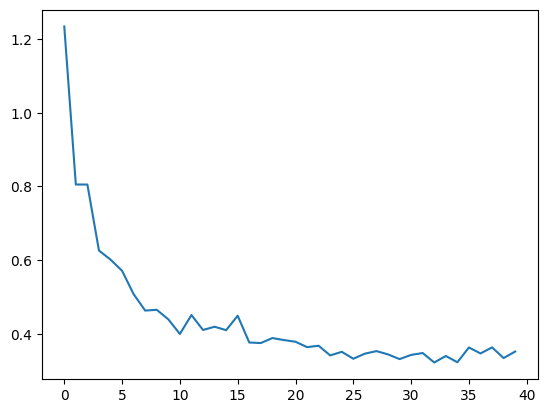

In [21]:
Y=history.history['loss']
plt.plot(range(len(Y)),Y)

In [22]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()

In [23]:
random.fit(xtrain,ytrain)
ypreds = random.predict(xtest)
threshold = 0.95
binary_predictions = convert_to_binary(ypreds, threshold)
accRF = accuracy_score(ytest,binary_predictions)
print(accRF)

0.8478260869565217


In [24]:
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression(max_iter=1000)
logmod.fit(xtrain,ytrain)
ypreds = logmod.predict(xtest)
threshold = 0.95
binary_predictions = convert_to_binary(ypreds, threshold)
accLR = accuracy_score(ytest,binary_predictions)
print(accLR)

0.8152173913043478
